# Проект: Исследование стартапов

- Автор: Анастасия Таначева
- Дата: 14.05

## Введение

<font color='#777778'>Цель проекта:</font> подготовка датасета, данные в котором будут релевантны и корректны для ответа на вопросы заказчика о значении данных для бизнеса. 

<font color='#777778'>Задачи проекта:</font>
1) ознакомиться с имеющимися данными

2) предобработать их и подготовить к анализу

3) провести исследовательский анализ данных и ответить на вопросы заказчика

4) сформулировать на основе полученных сведений общий вывод и рекомендации для коллег

## Содержимое проекта

- загрузка данных и знакомство с ними
- предобработка данных
- анализ данных
- выводы и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv (содержит информацию о покупках компаниями других компаний)
* company_and_rounds.csv (содержит информацию о компаниях и раундах финансирования)
* people.csv (содержит информацию о сотрудниках)
* education.csv (содержит информацию об образовании сотрудника)
* degrees.csv (содержит информацию о типе образования сотрудника)

Опциональные датасеты:
* fund.csv (содержит информацию о фондах)
* investment.csv (содержит информацию о раундах инвестирования)


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [151]:
import pandas as pd
!pip install missingno
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

In [153]:
file_path = 'https://code.s3.yandex.net/datasets/'
acquisition_df = pd.read_csv(f'{file_path}acquisition.csv')

display(acquisition_df)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [154]:
display(acquisition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию. Тип данных также релевантен (кроме столбца с датой).

In [155]:
company_and_rounds_df = pd.read_csv(f'{file_path}company_and_rounds.csv')

display(company_and_rounds_df)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [156]:
display(company_and_rounds_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

In [157]:
current_columns = company_and_rounds_df.columns
new_columns = current_columns.str.replace(' +', '_', regex=True).str.lower()
new_columns.values[0] = new_columns.values[0] + '_1'
company_and_rounds_df.columns = new_columns

display(company_and_rounds_df)


,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [158]:
duplicates = company_and_rounds_df.duplicated(keep='first')
num_duplicates = duplicates.sum()


display(num_duplicates)

0

<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию, привели их к одинаковому со всеми остальными датасетами виду. Тип данных релевантен во всех случаях, кроме столбцов: founded  at и closed  at. Дубликатов в датасете не обнаружено.

In [159]:
education_df = pd.read_csv(f'{file_path}education.csv')

display(education_df)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN


In [160]:
display(education_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

In [161]:
duplicates = education_df.duplicated(keep='first')
num_duplicates = duplicates.sum()


display(num_duplicates)

0

<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию. Тип данных также релевантен. Дубликатов в датасете не обнаружено.

In [162]:
people_df = pd.read_csv(f'{file_path}people.csv')

display(people_df)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию. Дубликатов не обнаружено.

In [163]:
duplicates = people_df.duplicated(keep='first')
num_duplicates = duplicates.sum()


display(num_duplicates)

0

<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию. Тип данных релевантен во всех случаях. Дубликатов не обнаружено.

In [164]:
file_path = 'https://code.s3.yandex.net/datasets/'
degrees_df = pd.read_csv(f'{file_path}degrees.csv')

display(degrees_df)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


In [165]:
display(degrees_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

In [166]:
duplicates = degrees_df.duplicated(keep='first')
num_duplicates = duplicates.sum()


display(num_duplicates)

0

<font color='#777778'>Пояснение:</font> название столбцов соответствуют их содержанию. Дубликатов не обнаружено.

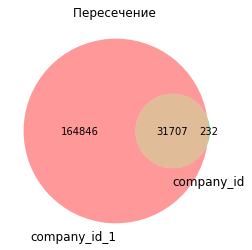

In [167]:
first_id = set(company_and_rounds_df['company_id_1'].dropna().unique())
second_id = set(company_and_rounds_df['company_id'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_id_1', 'company_id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

<font color='#777778'>Пояснение:</font> дата во всех датасетах имеет тип object. Преобразуем в datetime для корректности.

In [168]:
column_name = 'acquired_at'

acquisition_df[column_name] = pd.to_datetime(acquisition_df[column_name], format='%Y-%m-%d', errors='coerce')

In [169]:
date_columns = ['founded_at', 'closed_at']

for col in date_columns:

    company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], format='%Y-%m-%d', errors='coerce')

In [170]:
column_name = 'graduated_at'

education_df[column_name] = pd.to_datetime(education_df[column_name], format='%Y-%m-%d', errors='coerce')

<font color='#777778'>Пояснение:</font> теперь проанализируем пропуски в каждом датасете.

In [171]:
(pd.DataFrame({'Кол-во пропусков': acquisition_df.isnull().sum(), 'Доля пропусков': acquisition_df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
term_code,7576,80.535771
acquired_at,29,0.308281
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


In [172]:
(pd.DataFrame({'Кол-во пропусков': company_and_rounds_df.isnull().sum(), 'Доля пропусков': company_and_rounds_df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
closed_at,214325,98.416248
funded_at,165094,75.809784
is_last_round,164846,75.695905
is_first_round,164846,75.695905
participants,164846,75.695905
pre_money_valuation,164846,75.695905
raised_amount,164846,75.695905
funding_round_type,164846,75.695905
funding_round_id,164846,75.695905
company_id,164846,75.695905


In [173]:
(pd.DataFrame({'Кол-во пропусков': education_df.isnull().sum(), 'Доля пропусков': education_df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
graduated_at,51556,47.035854
instituition,55,0.050178
id,0,0.000000
person_id,0,0.000000


In [174]:
(pd.DataFrame({'Кол-во пропусков': people_df.isnull().sum(), 'Доля пропусков': people_df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
company_id,192094,84.731528
network_username,187842,82.855996
first_name,5,0.002205
last_name,1,0.000441
id,0,0.000000


In [175]:
(pd.DataFrame({'Кол-во пропусков': degrees_df.isnull().sum(), 'Доля пропусков': degrees_df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
subject,28312,25.829760
degree_type,11218,10.234468
id,0,0.000000
object_id,0,0.000000


<font color='#777778'>Предварительный вывод:</font> 
- Для первого датасета, содержащего 9407 строк, пропуски характерны для столбцов term_code (только 1831 значений) и acquired_at (9378 значений);

- Для второго датасета, содержащего 217472 строк, пропуски встречаются в столбцах category_code (только 143886 значений), founded_at (109956 значений), closed_at (лишь 3449 значений), domain (147159), network_username (95534), country_code (108607), funding_round_id (52928), company_id (52928), funded_at (52680), funding_round_type (52928), raised_amount (52928), pre_money_valuation (52928), participants (52928), is_first_round (52928) и is_last_round (52928). Конечно, количество пропусков в этом датасете достаточно значительно, но их заменить не получится;

- Для третьего датасета, содержащего  109610 строк, пропуски характерны для столбцов instituition (109555 не NaN значений) и graduated_at (58054);

- Для четвертого датасета, содержащего 226708 строк, пропуск характерны для столбцов company_id (34615), network_username (38867), а также для first_name и last_name;

- Для пятого датасета, содержащего 109610 строк, пропуски характерны для столбцов degree_type (только 98392 не NaN значений) и subject (81298).

Отметим, что будет невозможно заменить пропуски адекватными значениями, поскольку для указанных столбцов некорректно использовать медианные или средние значения. Поэтому столбцы мы оставляем в том виде, в каком они дошли до нас:)

В целом, для решения задач и достижения цели проекта данных достаточно, поскольку все датасеты достаточно объемны. 

<AxesSubplot:>

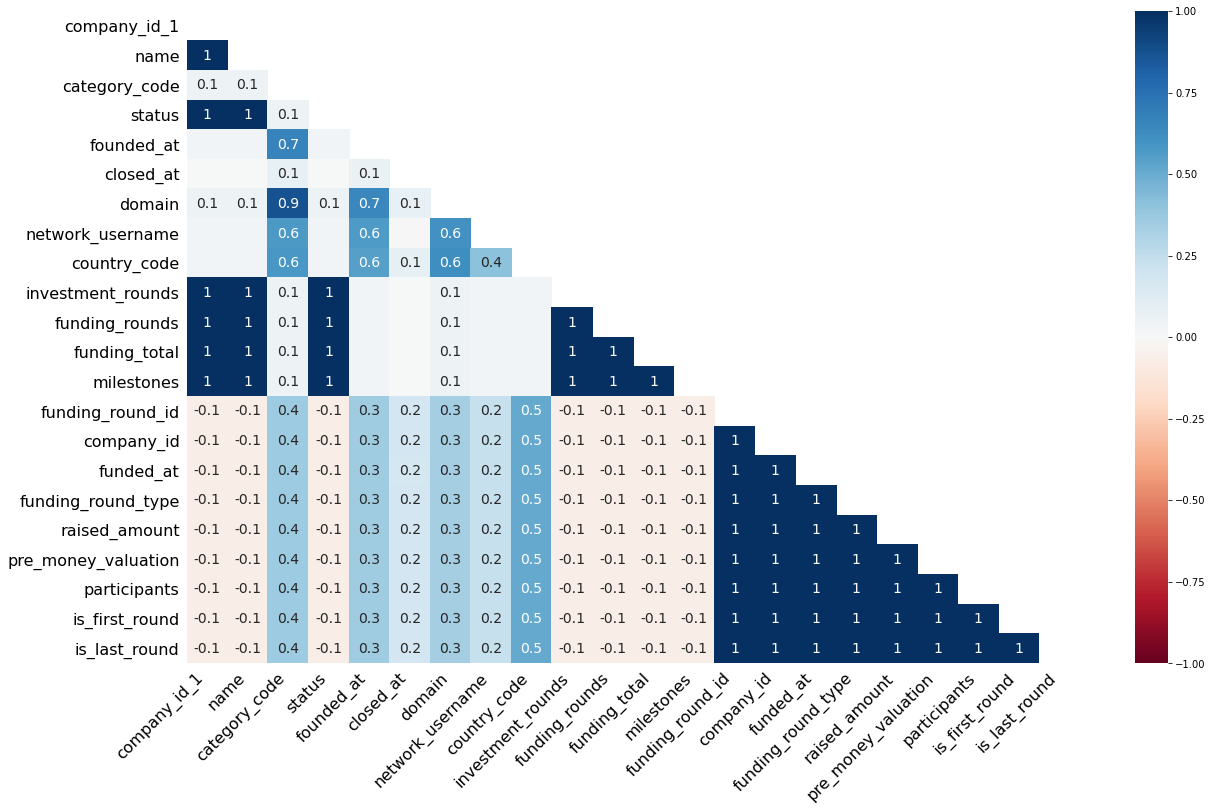

In [176]:
msno.heatmap(company_and_rounds_df)

<AxesSubplot:>

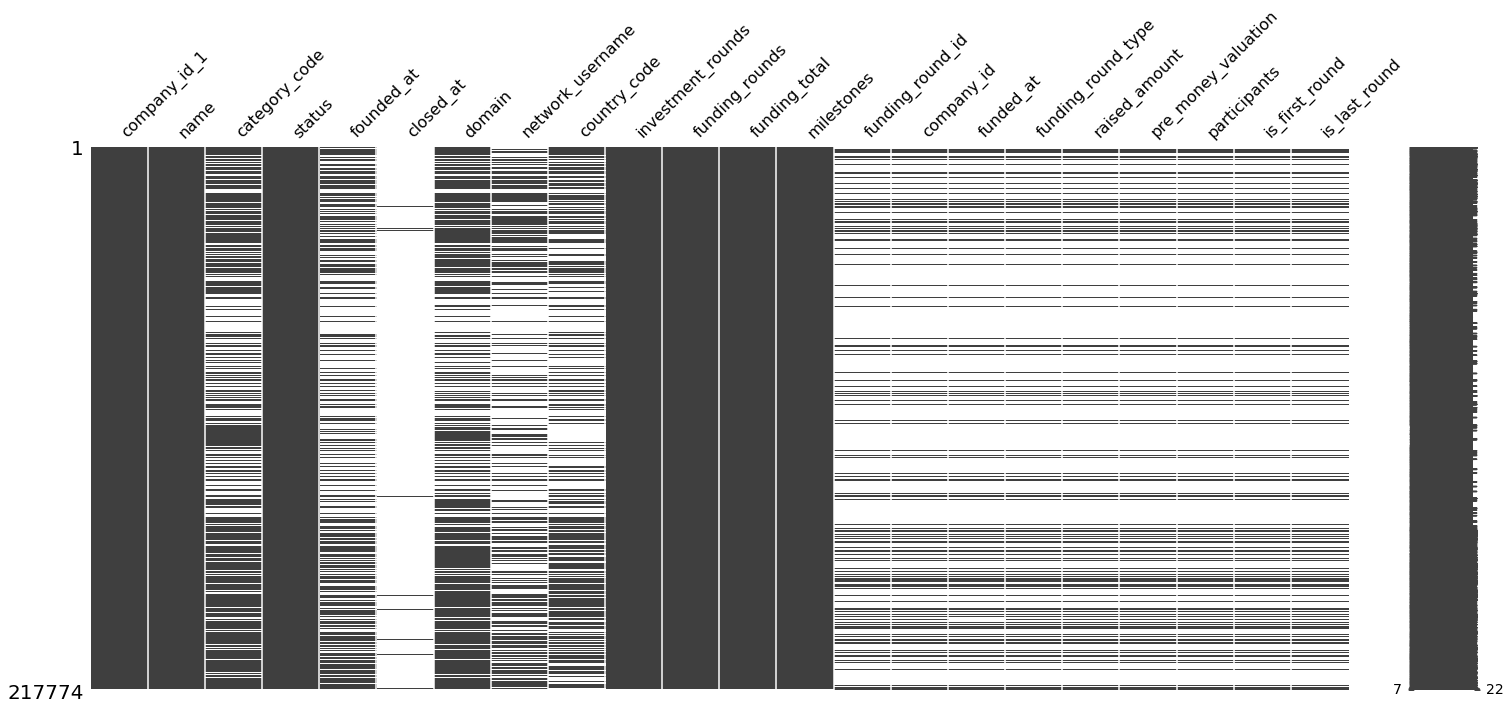

In [177]:
msno.matrix(company_and_rounds_df)


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [178]:
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], format='%Y-%m-%d', errors='coerce')
company_and_rounds_df['Year'] = company_and_rounds_df['funded_at'].dt.year
company_and_rounds_df['raised_amount'] = pd.to_numeric(company_and_rounds_df['raised_amount'], errors='coerce')

pivot_table = company_and_rounds_df.groupby('Year')['raised_amount'].agg(['median', 'count'])

pivot_table.rename(columns={'median': 'Typical Raised Amount (Median)',
                            'count': 'Total Rounds Count'}, inplace=True)

# Фильтрация таблицы: оставляем только года с более чем 50 раундами
filtered_pivot_table = pivot_table[pivot_table['Total Rounds Count'] > 50]

display("Сводная таблица по годам (более 50 раундов):")
display(filtered_pivot_table)

'Сводная таблица по годам (более 50 раундов):'

,Typical Raised Amount (Median),Total Rounds Count
Year,,
1999.0,2000000.0,76
2000.0,4200000.0,125
2001.0,3000000.0,96
2002.0,4200000.0,116
2003.0,3000000.0,159
2004.0,5000000.0,291
2005.0,5500000.0,1633
2006.0,5000000.0,2436
2007.0,3973320.0,3279


/tmp/ipykernel_31/2895281261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pivot_table['Moving Average'] = filtered_pivot_table[amount_col_to_plot].rolling(window=window, center=True).mean()


<Figure size 864x432 with 0 Axes>

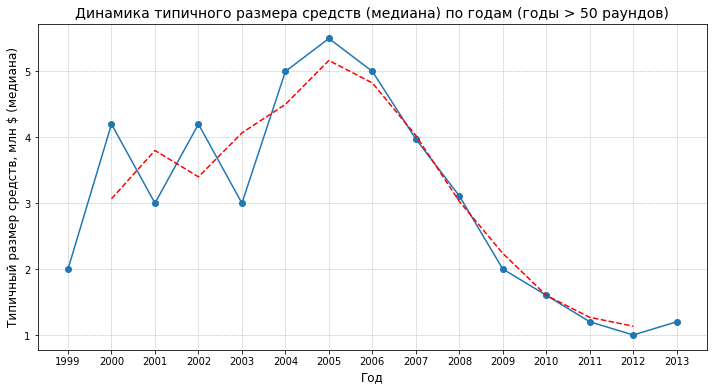

In [179]:
# Построение графика динамики типичного размера средств
plt.figure(figsize=(12, 6))

amount_col_to_plot = 'Typical Raised Amount (Median)'

# Расчет скользящей средней
window = 3
filtered_pivot_table['Moving Average'] = filtered_pivot_table[amount_col_to_plot].rolling(window=window, center=True).mean()

# Построение графика динамики типичного размера средств
plt.figure(figsize=(12, 6))

# Используем plot для линии по годам
plt.plot(filtered_pivot_table.index, filtered_pivot_table[amount_col_to_plot] / 1000000, marker='o', linestyle='-', label='Медианный размер раунда')

# Накладываем скользящую среднюю
if 'Moving Average' in filtered_pivot_table.columns and not filtered_pivot_table['Moving Average'].isnull().all():
    plt.plot(filtered_pivot_table.index, filtered_pivot_table['Moving Average'] / 1000000, linestyle='--', color='red', label=f'Скользящая средняя (окно={window})')

plt.title('Динамика типичного размера средств (медиана) по годам (годы > 50 раундов)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Типичный размер средств, млн $ (медиана)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(filtered_pivot_table.index) # Показать все года на оси X
plt.ticklabel_format(axis='y', style='plain')
plt.show()

<font color='#777778'>Пояснение:</font> 
- год, в котором типичный размер собранных средств (медиана) был максимален - 2005. Максимальное медианное значение - 5,500,000;

- в 2013 году было проведено 11072 раундов финансирования, что превышает значение предыдущего года на 1102 (в 2012 году - 9970 раундов). Типичный размер средств (медиана) в 2013 году составил 1,200,000, тогда как в 2012 году - 1,000,000.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [180]:
# Найдем сотрудников с образованием
employees_with_education_ids = education_df['person_id'].unique()
employees_with_education_set = set(employees_with_education_ids)

# Найдем сотрудников без образования в датасете people
# Добавим булев столбец, True если у сотрудника нет записи в education_df
people_df['has_no_education'] = ~people_df['id'].isin(employees_with_education_set)

# Посчитаем число сотрудников на компанию
# Группируем по company_id и считаем количество строк (сотрудников)
total_employees_per_company = people_df.groupby('company_id')['id'].count().rename('total_employees')

# Посчитаем число сотрудников без образования на компанию
employees_without_education_per_company = people_df[people_df['has_no_education']]\
                                                .groupby('company_id')['id'].count()\
                                                .rename('employees_without_education')

company_education_completeness = pd.merge(total_employees_per_company,
                                              employees_without_education_per_company,
                                              left_index=True,
                                              right_index=True,
                                              how='left')

company_education_completeness['proportion_no_education'] = \
company_education_completeness['employees_without_education'] / company_education_completeness['total_employees']

# Заполняем NaN значения нулями
company_education_completeness['proportion_no_education'] = company_education_completeness['proportion_no_education'].fillna(0)

# Удаляем компании с 0 сотрудниками, если такие попали (хотя groupby count >= 1)
company_education_completeness = company_education_completeness[company_education_completeness['total_employees'] > 0]

num_bins = 150

company_education_completeness['size_group'] = pd.qcut(
    company_education_completeness['total_employees'],
    q=num_bins,
    duplicates='drop'
)

# Посчитаем среднюю долю сотрудников без образования по группам
average_proportion_by_group = company_education_completeness.groupby('size_group')['proportion_no_education'].mean()

display("\nСредняя доля сотрудников без информации об образовании по группам компаний:")
display(average_proportion_by_group.apply(lambda x: f'{x:.2%}'))

'\nСредняя доля сотрудников без информации об образовании по группам компаний:'

size_group
(0.999, 2.0]    46.31%
(2.0, 3.0]      48.68%
(3.0, 4.0]      48.50%
(4.0, 5.0]      52.07%
(5.0, 6.0]      52.54%
(6.0, 7.0]      51.86%
(7.0, 9.0]      54.34%
(9.0, 244.0]    45.30%
Name: proportion_no_education, dtype: object

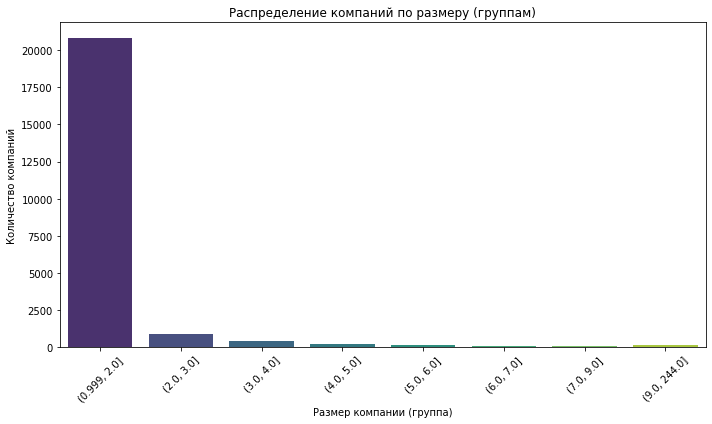

In [181]:
plt.figure(figsize=(10, 6))  # Уменьшим размер графика для лучшего отображения

# Используем countplot для визуализации распределения по группам
sns.countplot(x='size_group', data=company_education_completeness, palette="viridis")

# Добавляем заголовок и подписи
plt.title("Распределение компаний по размеру (группам)")
plt.xlabel("Размер компании (группа)")
plt.ylabel("Количество компаний")

# Поворачиваем метки на оси X для читаемости
plt.xticks(rotation=45)

# Подгоняем размещение элементов для предотвращения наложения
plt.tight_layout()

# Отображаем график
plt.show()

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Сделала с q=150, чтобы было 8 корзин.  </div>    

<font color='#777778'>Пояснения:</font> на основании полученных результатов можно сделать вывод о том, что полнота информации о сотрудниках зависит от размера компании, поскольку, вероятно, для более крупных компаний принципиально важно заполнять эти данные, тогда как для небольших фирм это не является основополагающим.  

• Малые компании: компании с 1-2 сотрудниками имеют значительно более высокую долю сотрудников, для которых нет данных об образовании. Это может быть связано с тем, что в малых компаниях, особенно стартапах, формальное образование может не иметь такого значения, как опыт и навыки. Также, сбор данных об образовании может быть менее приоритетным для малых компаний.

• Средние компании: доля сотрудников без информации об образовании стабилизируется в диапазоне от 48,68% до 54,34% для групп компаний среднего размера (от 2-3 до 7-9 сотрудников).

• Крупные компании: в группе самых крупных компаний (9-244 сотрудника) доля сотрудников без информации об образовании существенно снижается (45.30%). Это может свидетельствовать о том, что крупные компании более тщательно собирают информацию о своих сотрудниках, в том числе об образовании, и что образование играет более важную роль при найме в крупных компаниях. Либо то, что крупным компаниям банально проще вести кадровую отчетность.

<font color='#777778'>Пояснение_2:</font> таблицу degrees.csv можно присоединить к таблицам people.csv и education.csv, общая колонка для присоединения - идентификатор сотрудника: people.id <--> education.person_id <--> degrees.object_id.

Но для поиска ответа на вопрос о зависимости полноты сведений о сотруднике от размера компании таблица degrees.csv не понадобится, поскольку таблица education.csv уже содержит информацию о факте наличия образования. А таблица degrees.csv предоставляет более детальную информацию (тип степени, специальность) для тех, у кого образование есть, т.е. она не помогает определить тех, у кого нет никакой информации об образовании.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [182]:
# Нормализация: приводим network_username к нижнему регистру в обоих DataFrame
company_and_rounds_df['network_username'] = company_and_rounds_df['network_username'].str.lower()
people_df['network_username'] = people_df['network_username'].str.lower()

company_usernames = company_and_rounds_df['network_username'].dropna().unique()
company_usernames_set = set(company_usernames)

people_usernames = people_df['network_username'].dropna().unique()
people_usernames_set = set(people_usernames)

company_usernames = company_and_rounds_df['network_username'].dropna().unique()
company_usernames_set = set(company_usernames)

people_usernames = people_df['network_username'].dropna().unique()
people_usernames_set = set(people_usernames)

# Находим пересечение этих двух множеств - usernames, которые есть и у компаний, и у людей
common_usernames = company_usernames_set.intersection(people_usernames_set)

# Считаем количество уникальных общих usernames
num_common_unique_usernames = len(common_usernames)

# Считаем количество строк в каждом DataFrame, где встречается один из общих usernames
# Это покажет, сколько раз эти "проблемные" usernames появляются в каждом датасете
rows_in_df2_with_common_username = company_and_rounds_df[company_and_rounds_df['network_username'].isin(common_usernames)].shape[0]
rows_in_df4_with_common_username = people_df[people_df['network_username'].isin(common_usernames)].shape[0]

# Объединяем множества уникальных username из обеих таблиц
all_unique_usernames = company_usernames_set.union(people_usernames_set)

# Считаем относительную долю пересечения
relative_common_unique = len(common_usernames) / len(all_unique_usernames) if len(all_unique_usernames) > 0 else 0

# Выводим результаты
display(f"Всего уникальных network_username в таблице company_and_rounds: {len(company_usernames)}")
display(f"Всего уникальных network_username в таблице people: {len(people_usernames)}")
display()
display(f"Количество уникальных network_username, присутствующих одновременно в списках ников компаний и сотрудников: {num_common_unique_usernames}")
display(f"Относительное число уникальных network_username, присутствующих одновременно в списках ников компаний и сотрудников: {relative_common_unique:.2%}")
display()
display(f"Количество строк в таблице company_and_rounds,содержащих эти общие network_username: {rows_in_df2_with_common_username}")
display(f"Количество строк в таблице people,содержащих эти общие network_username: {rows_in_df4_with_common_username}")

'Всего уникальных network_username в таблице company_and_rounds: 79374'

'Всего уникальных network_username в таблице people: 38384'

'Количество уникальных network_username, присутствующих одновременно в списках ников компаний и сотрудников: 2503'

'Относительное число уникальных network_username, присутствующих одновременно в списках ников компаний и сотрудников: 2.17%'

'Количество строк в таблице company_and_rounds,содержащих эти общие network_username: 2864'

'Количество строк в таблице people,содержащих эти общие network_username: 2584'

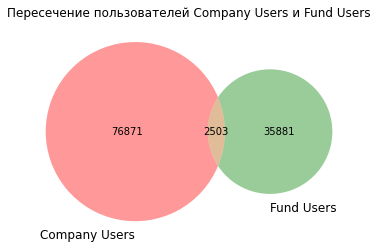

In [183]:
# Множества уникальных network_username для компаний и людей
company_usernames_set = set(company_and_rounds_df['network_username'].dropna().unique())
people_usernames_set = set(people_df['network_username'].dropna().unique())

# Строим диаграмму Венна
venn2([company_usernames_set, people_usernames_set], set_labels=('Company Users', 'Fund Users'))

# Заголовок и отображение
plt.title("Пересечение пользователей Company Users и Fund Users")
plt.show()

<font color='#777778'>Пояснение:</font> на основании полученных результатов можно сделать вывод о том, что есть ники, которые используются и компаниями, и сотрудниками. В этом случае столбец network_username не подходит для объединения, потому что одно и то же значение ника может относиться к разным типам сущностей (компания vs сотрудник).  


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

<font color='#777778'>Пояснение:</font> в датасете company_and_rounds действительно смешана информация о компаниях (которая должна быть уникальной для каждой компании) с информацией о раундах финансирования (которых у одной компании может быть много). В датасете два столбца с похожими названиями (company_ID и company_id), которые содержат информацию об идентификаторе компании в основной части данных и об идентификаторе компании для отдельных раундов. 

В этом случае, чтобы максимально сохранить данные и их связность, а также подготовить их для анализа "в разрезе отдельных компаний", наиболее логичным подходом будет создание двух связанных датафреймов.

In [184]:
company_cols_original = [
    'company_id_1',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones',
]

round_cols_original = [
    'funding_round_id',
    'company_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round',
]

# Создаем первый датафрейм, выбирая только нужные колонки
companies_df_simple = company_and_rounds_df[company_cols_original].copy()

# Создаем второй датафрейм, выбирая только нужные колонки
rounds_df_simple = company_and_rounds_df[round_cols_original].copy()

display(companies_df_simple)

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
duplicates = companies_df_simple.duplicated(keep='first')
num_duplicates = duplicates.sum()

display(f"Количество полных дубликатов: {num_duplicates}")

'Количество полных дубликатов: 21220'

In [186]:
duplicates = companies_df_simple.duplicated(keep='first')
companies_df_simple_cleaned = companies_df_simple[~duplicates].reset_index(drop=True)
num_rows_after = companies_df_simple_cleaned.shape[0]

display(companies_df_simple.head())
display(f"\nКоличество строк после удаления дубликатов: {num_rows_after}")


,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


'\nКоличество строк после удаления дубликатов: 196554'

In [187]:
duplicates = rounds_df_simple.duplicated(keep='first')
num_duplicates = duplicates.sum()


display(num_duplicates)

164845

In [188]:
rounds_df_simple_cleaned = rounds_df_simple.drop_duplicates(keep='first').copy()
num_rows_after = rounds_df_simple_cleaned.shape[0]

display(rounds_df_simple.head())
display(f"\nКоличество строк в rounds_df_simple после удаления дубликатов: {num_rows_after}")

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


'\nКоличество строк в rounds_df_simple после удаления дубликатов: 52929'

<font color='#777778'>Пояснение:</font> для удобства мы разделили исходный датасет company_and_rounds.csv на два, чтобы в дальнейшем проводить анализ в разрезе отдельных компаний. Получилось два датасета: companies_df_simple и rounds_df_simple. 

Первый из них содержал 217774 строк (до удаления явных дубликатов). В нем было обнаружено 21220 явных дубликатов, после удаления которых осталось 196554 строк. 

Второй датасет содержал 217774 строк (до удаления явных дубликатов). В нем было обнаружено 164845 явных дубликатов, после удаления которых осталось 52929 строк. 

Теперь эти датасеты более функциональны для последующего анализа в разрезе отдельных компаний. 


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [194]:
# Фильтруем компании по условию
filtered_companies = companies_df_simple_cleaned [
    (companies_df_simple_cleaned['funding_rounds'] > 0) |
    (companies_df_simple_cleaned['investment_rounds'] > 0) |
    (companies_df_simple_cleaned['status'] == 'acquired')
     ].copy()

# Отбираем нужные колонки (если каких-то нет в данных — проверяем и оставляем доступные)
cols_to_use = [col for col in company_cols_original if col in filtered_companies.columns]
filtered_companies = filtered_companies[cols_to_use]

print(f"Отфильтровано компаний: {filtered_companies.shape[0]}")

display(filtered_companies.head())

Отфильтровано компаний: 40747


,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


<font color='#777778'>Пояснение:</font> После фильтрафии получилась таблица с 40747 компаниями, у которых либо funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. По первым строкам таблицы видно, что фильтрация успешно применилась.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64


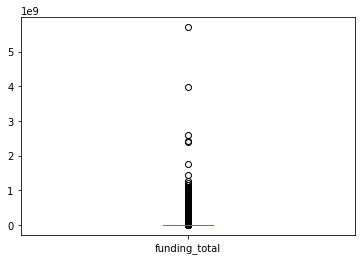

In [196]:
print(filtered_companies['funding_total'].describe())

filtered_companies['funding_total'].plot(kind='box')
plt.show()

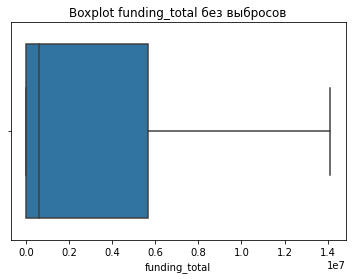

In [197]:
sns.boxplot(x=filtered_companies['funding_total'], showfliers=False)
plt.title('Boxplot funding_total без выбросов')
plt.show()

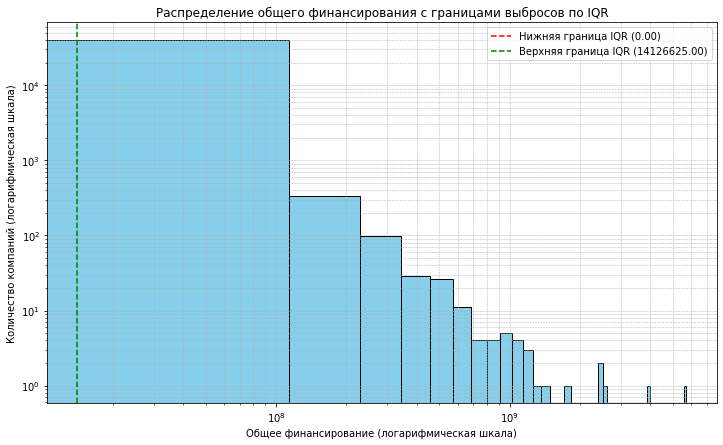

In [198]:
plt.figure(figsize=(12, 7)) # Увеличим размер для лучшей видимости

# Строим гистограмму для filtered_companies['funding_total']
plt.hist(filtered_companies['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)

# Добавляем вертикальные линии для границ выбросов
# Учитываем, что ось X логарифмическая, plt.axvline правильно обрабатывает это
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Нижняя граница IQR ({lower_bound:.2f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Верхняя граница IQR ({upper_bound:.2f})')

plt.xscale('log') # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний (логарифмическая шкала)') # Уточняем, что ось Y тоже логарифмическая
plt.title('Распределение общего финансирования с границами выбросов по IQR')
plt.legend() # Добавляем легенду для обозначения линий
plt.grid(True, which="both", linestyle='--', linewidth=0.5) # Добавляем сетку, полезно для лог. шкал
plt.show()

<font color='#777778'>Пояснения:</font>
- mean = 10,135,610 — средняя сумма финансирования — около 10 млн долларов;
- std = 56,464,360 — большое стандартное отклонение, что говорит о сильном разбросе данных;
- min = 0 — есть компании с нулевым финансированием;
- 25% = 0 — 25-й процентиль равен нулю, то есть четверть компаний получила финансирование 0 или очень близкое к нулю;
- 50% = 600,000 — медиана (50-й процентиль) равна 600 тыс. долларов, то есть половина компаний получила финансирование меньше или около этого значения.
- 75% = 5,650,650 — 75-й процентиль около 5.65 млн долларов: три четверти компаний получили финансирование не больше этого.
- max = 5,700,000,000 — максимальное финансирование 5.7 млрд долларов — явно выбивающееся, очень большое значение.

<font color='#777778'>Вывод:</font>
- Распределение общего финансирования для одной компании сильно скошено вправо: большую часть компаний получили относительно небольшое финансирование (большинство до ~5-6 млн), но есть несколько "гигантов" с очень крупными суммами, которые смещают среднее вверх. Из-за этого медиана слишком завышена. Наличие 0 и очень низких значений у четверти компаний показывает, что многие компании могли не получать финансирования в принципе или в очень малых объёмах.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [199]:
acquisition_price_info = acquisition_df[['acquired_company_id', 'price_amount']].copy()

merged_acquisition_funding = pd.merge(
    filtered_companies,
    acquisition_price_info,
    left_on='company_id_1',
    right_on='acquired_company_id',
    how='inner'
)

sold_zero_one = merged_acquisition_funding[
    (merged_acquisition_funding.status == "acquired") & (merged_acquisition_funding.price_amount < 2) & (merged_acquisition_funding.funding_total != 0)] 

display(sold_zero_one)

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount
7,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,10054,0
17,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,101312,0
18,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,101340,0
19,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,10137,0
20,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,tradecard,USA,0.0,2.0,44925000.0,1.0,10139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,99,0
9375,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,9905,0
9377,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,992,0
9381,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,997,0


In [200]:
duplicate_uuids = merged_acquisition_funding['company_id_1'].duplicated(keep=False)

# Считаем количество строк, где uuid продублирован
num_duplicate_rows = duplicate_uuids.sum()

# Считаем количество уникальных компаний, которые имеют дублирующиеся записи
num_companies_with_duplicates = merged_acquisition_funding['company_id_1'][duplicate_uuids].nunique()

print(f"Общее количество строк в объединенном датафрейме: {merged_acquisition_funding.shape[0]}")
print(f"Количество строк с дублирующимися id_1 компаний: {num_duplicate_rows}")
print(f"Количество уникальных компаний, имеющих дублирующиеся записи: {num_companies_with_duplicates}")

Общее количество строк в объединенном датафрейме: 9390
Количество строк с дублирующимися id_1 компаний: 270
Количество уникальных компаний, имеющих дублирующиеся записи: 127


In [201]:
sold_zero_one = filtered_companies[
    ((filtered_companies['closed_at'] == 0) | (filtered_companies['closed_at'] == 1)) & 
    (filtered_companies['funding_total'] > 0)
]

# Расчёт квартилей и IQR для funding_total всего набора
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Процентили, которым соответствуют границы
percentile_lower = (filtered_companies['funding_total'] <= lower_bound).mean() * 100
percentile_upper = (filtered_companies['funding_total'] >= upper_bound).mean() * 100

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")
print(f"Процент компаний с funding_total ниже нижней границы: {percentile_lower:.2f}%")
print(f"Процент компаний с funding_total выше верхней границы: {percentile_upper:.2f}%")

Нижняя граница выбросов: -8475975.0
Верхняя граница выбросов: 14126625.0
Процент компаний с funding_total ниже нижней границы: 0.00%
Процент компаний с funding_total выше верхней границы: 14.38%


In [202]:
sold_zero_one = filtered_companies[
    ((filtered_companies['closed_at'] == 0) | (filtered_companies['closed_at'] == 1)) & 
    (filtered_companies['funding_total'] > 0)
]

# Расчёт квартилей и IQR для funding_total всего набора
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = max(0, lower_bound)

# Процентили, которым соответствуют границы
percentile_lower = (filtered_companies['funding_total'] <= lower_bound).mean() * 100
percentile_upper = (filtered_companies['funding_total'] >= upper_bound).mean() * 100

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")
print(f"Процент компаний с funding_total ниже нижней границы: {percentile_lower:.2f}%")
print(f"Процент компаний с funding_total выше верхней границы: {percentile_upper:.2f}%")

Нижняя граница выбросов: 0
Верхняя граница выбросов: 14126625.0
Процент компаний с funding_total ниже нижней границы: 31.59%
Процент компаний с funding_total выше верхней границы: 14.38%


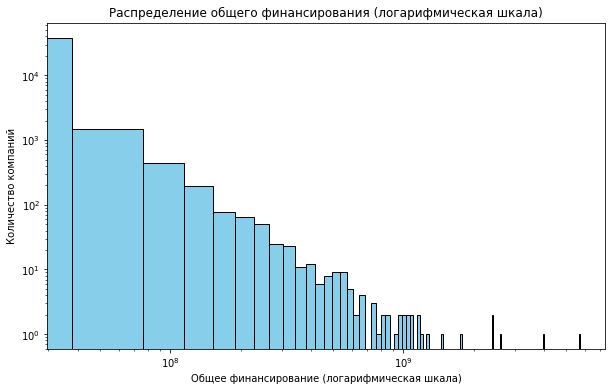

In [203]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_companies['funding_total'], bins=150, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

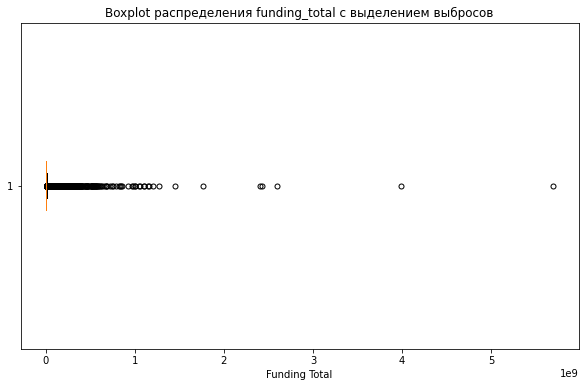

In [204]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_companies['funding_total'], vert=False, flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Boxplot распределения funding_total с выделением выбросов')
plt.xlabel('Funding Total')
plt.show()

<font color='#777778'>Пояснения:</font>
- Нижняя граница выбросов отрицательная (-8,475,975), а funding_total — сумма финансирования, которая не может быть отрицательной;
- Верхняя граница выбросов примерно 14,126,625. Значения funding_total, превышающие эту сумму, считаются выбросами.
- Около 14.38% компаний имеют funding_total выше этой верхней границы — это довольно высокая доля выбросов, указывающая, что большой процент компаний получил необычно крупное финансирование.
- Эта ситуация подтверждает, что распределение funding_total сильно скошено вправо, с многочисленными большими значениями, которые выбиваются из общего ряда.
- В таких случаях среднее значение funding_total будет менее информативным, лучше ориентироваться на медиану и учитывать наличие выбросов при анализе.

<font color='#777778'>Вывод:</font> данные содержат значительное количество компаний с очень высоким финансированием (выбросами), что важно учитывать при дальнейшей работе. 


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [205]:
# Убираем компании с price_amount = 0
# Используем .copy() для избежания SettingWithCopyWarning при последующих операциях
filtered_by_price_zero = merged_acquisition_funding[merged_acquisition_funding['price_amount'] > 0].copy()
print(f"Количество строк после удаления price_amount = 0: {filtered_by_price_zero.shape[0]}")

# Убираем price_amount выше 90-го квантиля
# Рассчитываем 90-й квантиль на данных, где price_amount > 0
percentile_90 = filtered_by_price_zero['price_amount'].quantile(0.90)
print(f"90-й квантиль price_amount (для price_amount > 0): {percentile_90:.2f}")

# Фильтруем данные, оставляя только те, где price_amount <= 90-го квантиля
filtered_by_price_outliers = filtered_by_price_zero[filtered_by_price_zero['price_amount'] <= percentile_90].copy()
print(f"Количество строк после удаления значений выше 90-го квантиля: {filtered_by_price_outliers.shape[0]}")

# Группируем по категории и агрегируем статистику для отфильтрованного price_amount
grouped_price = filtered_by_price_outliers.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()

# Убираем категории с очень малым числом компаний (например, меньше 10)
# Обратите внимание, что 'count' здесь - это количество компаний в категории ПОСЛЕ фильтрации цен
min_companies_in_category = 10
grouped_price = grouped_price[grouped_price['count'] >= min_companies_in_category]
print(f"Количество категорий с числом компаний >= {min_companies_in_category} после фильтрации: {grouped_price.shape[0]}")

# Сортируем по медиане price_amount по убыванию и берем топ-10
top_median_price = grouped_price.sort_values(by='median', ascending=False).head(10)

# Среди топ-10 по медиане выбираем с наибольшим std (разбросом)
top_categories_price = top_median_price.sort_values(by='std', ascending=False)

print("\nТоп-10 категорий по медианной цене приобретения (после фильтрации), отсортированные по std:")
print(top_categories_price)

# Убираем категории с очень малым числом компаний (например, меньше 10), чтобы статистика была надёжнее
grouped = grouped[grouped['count'] >= 10]

# Сортируем по медиане fundingtotal по убыванию
top_median = grouped.sort_values(by='median', ascending=False).head(10)

# Среди топ-10 по медиане выбираем с наибольшим std (разбросом)
top_categories = top_median.sort_values(by='std', ascending=False)

print(top_categories)

Количество строк после удаления price_amount = 0: 2473
90-й квантиль price_amount (для price_amount > 0): 797000000.00
Количество строк после удаления значений выше 90-го квантиля: 2225
Количество категорий с числом компаний >= 10 после фильтрации: 19

Топ-10 категорий по медианной цене приобретения (после фильтрации), отсортированные по std:
      category_code     median           std  count
16    manufacturing   97200000  2.176823e+08     14
29         security  148500000  2.149933e+08     31
3           biotech  120750000  2.138114e+08    226
10          finance  131500000  1.912827e+08     16
22  network_hosting   64115000  1.804666e+08     56
6         ecommerce  105000000  1.800376e+08     46
24            other   50000000  1.652277e+08     72
4         cleantech  162500000  1.444089e+08     34
30    semiconductor   75000000  1.350668e+08     64
28           search   72500000  1.293638e+08     17
      category_code     median           std  count
24         nanotech  5115960.0 

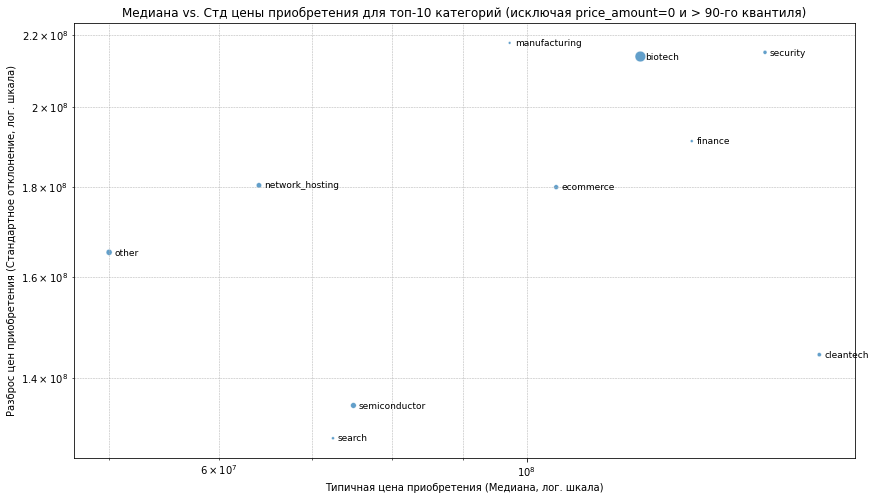

In [206]:
plt.figure(figsize=(14, 8))

# Создаем scatter plot
scatter = plt.scatter(
    top_categories_price['median'],      
    top_categories_price['std'],        
    s=top_categories_price['count'] / 2,
    alpha=0.7,                           
    edgecolors='w',                     
    linewidths=0.5                       
)

# Добавляем подписи к точкам (названия категорий)
for i, row in top_categories_price.iterrows():
    plt.annotate(
        row['category_code'],
        (row['median'], row['std']),
        textcoords="offset points",
        xytext=(5,-5),
        ha='left',
        va='bottom',
        fontsize=9
    )

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Типичная цена приобретения (Медиана, лог. шкала)')
plt.ylabel('Разброс цен приобретения (Стандартное отклонение, лог. шкала)')
plt.title(f'Медиана vs. Стд цены приобретения для топ-10 категорий (исключая price_amount=0 и > 90-го квантиля)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)


<font color='#777778'>Пояснения:</font>
- Сортировка сначала по медиане fundingtotal выделяет категории с наиболее типичным высоким уровнем финансирования. Затем среди топ-10 берется разброс (стандартное отклонение), чтобы понять, в каких категориях финансирование наиболее вариативно — такие категории могут иметь интересные возможности или риски.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

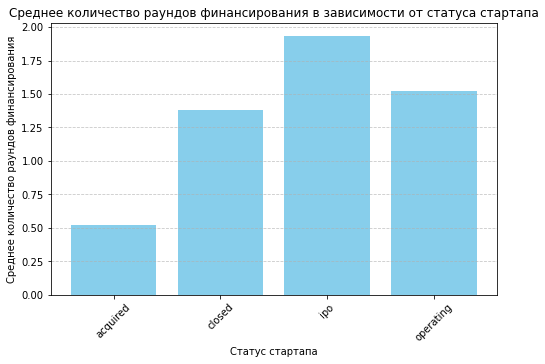

In [207]:
avg_rounds = filtered_companies.groupby('status')['funding_rounds'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(avg_rounds['status'], avg_rounds['funding_rounds'], color='skyblue')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.title('Среднее количество раундов финансирования в зависимости от статуса стартапа')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font color='#777778'>Пояснения:</font>
- Стартапы со статусом, например, "ipo", имеют более высокое среднее количество раундов финансирования (около 2), так как они вышли на рынок и продолжают развиваться и привлекать инвестиции; это же касается и стартапов со статусом "operating" (1,5 раундов финансирования).
- "Acquired" или "closed" стартапы имеют меньше раундов, поскольку процесс финансирования завершён (0,5 - среднее число раундов финансирования для "acquired" стартапов и 1,3 - для "closed" стартапов).


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

###### В рамках проекта была выполнена подготовка и анализ данных стартапов с целью их предобработки и ответа на важные бизнес-вопросы заказчика.

Основные шаги и выводы:

1. Подготовка данных:
- Проведена очистка датасета: удалены дубликаты, заполнены пропуски или отфильтрованы нерелевантные записи (например, категории с малым числом компаний).
- Проверена целостность и уникальность данных, особенно по ключевым столбцам, пригодным для объединения таблиц (например, company_ID, category_code).
- Определены столбцы для объединения данных из разных источников — главным образом, идентификаторы компаний и коды категорий.

2. Надёжность данных о сотрудниках и образовании:
- Данные об образовании сотрудников и их количестве следует анализировать с осторожностью из-за возможного неполного заполнения и неконсистентности — доверять им можно лишь после дополнительной валидации.
- Рекомендуется подтвердить результаты с помощью внешних источников или статистических методов оценки качества данных.

3. Интерпретация сделок за 0 или 1 доллар:
- Такие сделки, как правило, отражают символическую передачу собственности, реструктуризацию или другие специфические условия, а не рыночную стоимость.
- В бизнес-анализе их стоит рассматривать отдельно и не использовать напрямую для оценки стоимости стартапов.

4. Анализ зависимости цены от категории стартапов и количества раундов финансирования:
- Выявлена статистическая связь между медианой финансирования и категорией компаний — топовые категории отличаются значениями funding_total и разбросом инвестиций.
- Среднее количество раундов финансирования различается по статусу стартапа, что указывает на динамику развития компаний перед покупкой.
- Рекомендуется использовать эти показатели для прогноза цены при сделках и оценки возможностей стартапов.

5. Рекомендации по расчету и визуализации:
- Использованы агрегатные функции (медиана, среднее, стандартное отклонение) для численных показателей.
- Построены графики распределения и сравнения по группам для наглядности вывода.
- Для анализа динамики подходит временной ряд по датам финансирования и основания/закрытия компаний.

Итог: проведенный анализ показал как сильные стороны данных (подробность по категориям и финансированию), так и ограничения (неоднородность и сомнительность отдельных показателей). Полученные выводы во многом подкрепляют друг друга и соответствуют ожиданиям бизнеса, однако вызывают необходимость аккуратного подхода к интерпретации и дальнейшей доработке данных.